In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import pandas as pd
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.shape

(19158, 14)

In [6]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [7]:
df.isnull().sum( )

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
#convert string to float
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_values = list(df.select_dtypes(include=['object']).columns.values)
for i in object_values:
    print(i)
    df[i].fillna('UNK', inplace=True)
    df[i] = le.fit_transform(df[i])

# convert all columns to one type (int)
enc = LabelEncoder()
for j in df.columns:
    df[j] = enc.fit_transform(df[j])

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [9]:
df.dtypes

enrollee_id               int64
city                      int64
city_development_index    int64
gender                    int64
relevent_experience       int64
enrolled_university       int64
education_level           int64
major_discipline          int64
experience                int64
company_size              int64
company_type              int64
last_new_job              int64
training_hours            int64
target                    int64
dtype: object

In [10]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0


In [11]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [12]:
df=df.set_index('enrollee_id')
df.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
5018,5,85,1,0,3,0,5,21,8,6,0,35,1
16986,77,48,1,1,3,0,5,6,4,5,4,46,0
6499,64,14,3,1,0,0,5,15,8,6,6,82,0
19067,14,52,3,1,2,0,1,20,8,5,6,51,1
358,50,45,1,0,3,2,5,21,4,1,3,7,0
12304,57,43,3,0,1,0,5,2,8,6,0,23,1
16451,49,85,1,0,3,1,6,15,4,1,0,23,0
218,83,41,1,0,3,0,5,4,7,5,4,17,1
15481,5,85,1,0,3,0,5,17,4,5,0,45,1


In [13]:
# normaliznig data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standard_data=df.copy()
standard_data =sc.fit_transform(standard_data)
standard_data=pd.DataFrame(standard_data,columns=df.columns)
standard_data.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,1.218165,1.188828,0.797357,-0.904269,-0.512663,1.735070
1,0.925077,-0.510081,-0.453100,1.603202,0.599493,-0.681411,0.128373,-1.050588,-0.207910,0.127279,0.918254,-0.300048,-0.576346
2,0.558499,-1.673406,1.725463,1.603202,-1.852315,-0.681411,0.128373,0.310664,1.188828,0.797357,1.829515,0.395783,-0.576346
3,-0.851418,-0.373219,1.725463,1.603202,-0.217776,-0.681411,-3.664035,1.066915,1.188828,0.127279,1.829515,-0.203405,1.735070
4,0.163722,-0.612727,-0.453100,-0.623752,0.599493,1.001625,0.128373,1.218165,-0.207910,-2.553031,0.462623,-1.053865,-0.576346
5,0.361110,-0.681158,1.725463,-0.623752,-1.035046,-0.681411,0.128373,-1.655589,1.188828,0.797357,-0.904269,-0.744607,1.735070
6,0.135524,0.755890,-0.453100,-0.623752,0.599493,0.160107,1.076475,0.310664,-0.207910,-2.553031,-0.904269,-0.744607,-0.576346
7,1.094267,-0.749589,-0.453100,-0.623752,0.599493,-0.681411,0.128373,-1.353089,0.839643,0.127279,0.918254,-0.860579,1.735070
8,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,0.613164,-0.207910,0.127279,-0.904269,-0.319377,1.735070
9,-1.105203,0.755890,1.725463,-0.623752,0.599493,-0.681411,0.128373,-0.748088,-0.557095,0.127279,0.918254,1.130272,-0.576346


In [14]:
x=standard_data.drop(columns="target")
x

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,1.218165,1.188828,0.797357,-0.904269,-0.512663
1,0.925077,-0.510081,-0.453100,1.603202,0.599493,-0.681411,0.128373,-1.050588,-0.207910,0.127279,0.918254,-0.300048
2,0.558499,-1.673406,1.725463,1.603202,-1.852315,-0.681411,0.128373,0.310664,1.188828,0.797357,1.829515,0.395783
3,-0.851418,-0.373219,1.725463,1.603202,-0.217776,-0.681411,-3.664035,1.066915,1.188828,0.127279,1.829515,-0.203405
4,0.163722,-0.612727,-0.453100,-0.623752,0.599493,1.001625,0.128373,1.218165,-0.207910,-2.553031,0.462623,-1.053865
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.304714,0.276874,-0.453100,1.603202,0.599493,-0.681411,-2.715933,-1.201839,1.188828,0.797357,-0.904269,-0.396691
19154,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,-1.201839,1.188828,0.797357,0.462623,-0.203405
19155,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,1.218165,-0.207910,0.127279,0.462623,-0.358034
19156,1.404449,-0.236358,-0.453100,-0.623752,0.599493,0.160107,1.076475,1.066915,0.141274,0.127279,-0.448639,0.647056


In [15]:
y=df['target']
y

enrollee_id
5018     1
16986    0
6499     0
19067    1
358      0
        ..
4117     1
17981    1
14021    0
3185     0
13567    0
Name: target, Length: 19158, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [21]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, classification_report

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.755741127348643
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2882
           1       0.51      0.45      0.48       950

    accuracy                           0.76      3832
   macro avg       0.67      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832



In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)

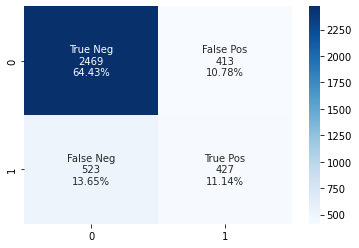

In [25]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

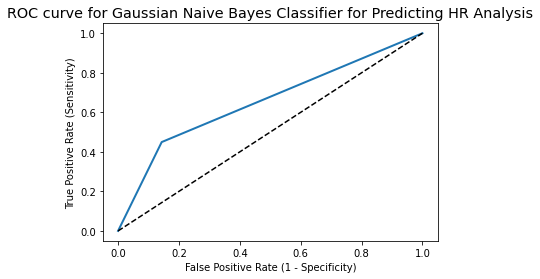

In [82]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting HR Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [33]:
x_test.shape

(3832, 12)